<a href="https://colab.research.google.com/github/jacekplonka/ML-Challange/blob/master/ML_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting income level | ING Machine Learning Challange




# Prepare data

In [1]:
!unzip ml-challenge-week6.zip

Archive:  ml-challenge-week6.zip
  inflating: census-income.data      
  inflating: census-income.names     
  inflating: census-income.test      
  inflating: sampleSubmission.csv    


In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]



In [0]:
col_names = ('age','class of worker','detailed industry recode','detailed occupation recode','education','wage per hour','enroll in edu inst last wk','marital status','major industry code','major occupation code','race','hispanic origin','sex','member of a labor union','reason for unemployment','full or part time employment stat','capital gains','capital losses','dividends from stocks','tax filer stat','region of previous residence','state of previous residence','detailed household and family stat','detailed household summary in household','instance weight','migration code-change in msa','migration code-change in reg','migration code-move within reg','live in this house 1 year ago','migration prev res in sunbelt','num persons worked for employer','family members under 18','country of birth father','country of birth mother','country of birth self','citizenship','own business or self employed','fill inc questionnaire for veteran\'s admin','veterans benefits','weeks worked in year','year','income class')

In [0]:
raw_train_data = pd.read_csv('census-income.data', names=col_names, delimiter=',', na_values=' ?')

raw_test_data = pd.read_csv('census-income.test', names=col_names, delimiter=',', na_values=' ?')


In [0]:
from sklearn.preprocessing import LabelEncoder

processed_train_data = raw_train_data.copy()
processed_test_data = raw_test_data.copy()

processed_train_data = processed_train_data.drop(['year','migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', 'migration prev res in sunbelt'], axis=1)
processed_test_data = processed_test_data.drop(['year',  'income class', 'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', 'migration prev res in sunbelt'], axis=1)

processed_train_data['state of previous residence'] = processed_train_data['state of previous residence'].fillna(value='Not in universe')
processed_test_data['state of previous residence'] = processed_test_data['state of previous residence'].fillna(value='Not in universe')
processed_train_data = processed_train_data.fillna(value='United-States')
processed_test_data = processed_test_data.fillna(value='United-States')

processed_train_data['income class'] = processed_train_data['income class'] != ' - 50000.'

for col in processed_train_data.columns:
  if processed_train_data[col].dtype == 'object':
    le = LabelEncoder()
    # processed_train_data[col].append(processed_test_data[col])
    le.fit(processed_train_data[col].append(processed_test_data[col]))
    processed_train_data[col] = le.transform(processed_train_data[col])
    
    processed_test_data[col] = le.transform(processed_test_data[col])

## Analyze data




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7d3286e10>,
      dtype=object)

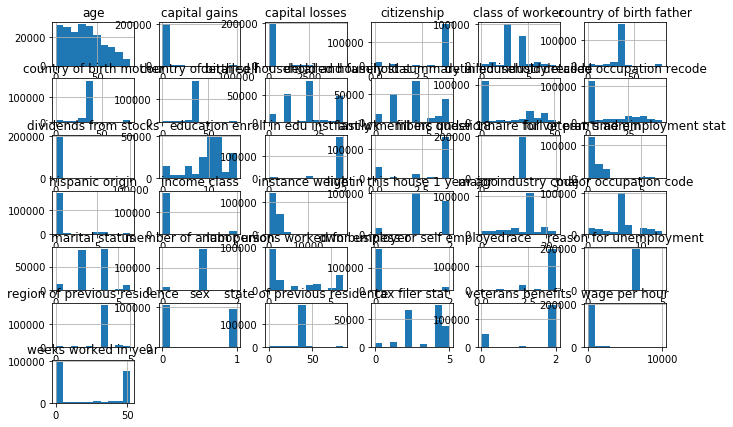

In [94]:
hist_data = processed_train_data.copy()

for col in processed_train_data.columns:
  if processed_train_data[col].dtype == 'bool':
    hist_data = hist_data.drop(labels=col, axis=1)
  
hist_data.hist()

  

# Further transformations

## Fit continous values into buckets (Bad idea, but leaving for consistency)

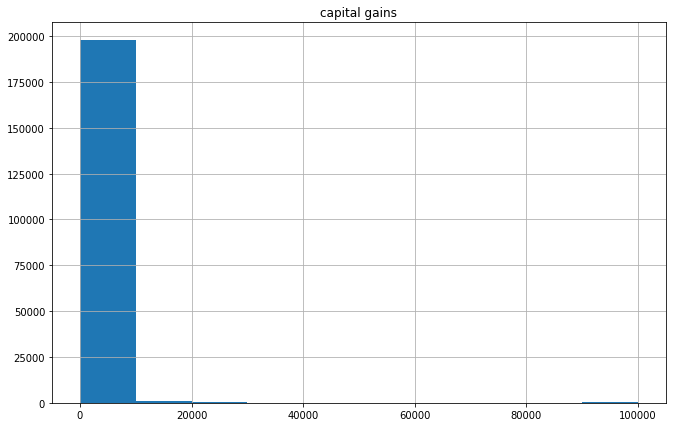

In [0]:
# from sklearn.preprocessing import KBinsDiscretizer

# gains = processed_train_data[['capital gains']].copy()
# gains.hist()
# kb = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')
# kb.fit(gains)
# gains = kb.transform(gains)

# processed_train_data['capital gains'] = gains.astype('int64')

# gains = processed_test_data[['capital gains']].copy()

# gains = kb.transform(gains)

# processed_test_data['capital gains'] = gains.astype('int64')

In [0]:
# processed_train_data['dividends from stocks'].hist()

In [0]:
# processed_train_data['dividends from stocks'] = processed_train_data['dividends from stocks'] > 0
# processed_test_data['dividends from stocks'] = processed_test_data['dividends from stocks'] > 0

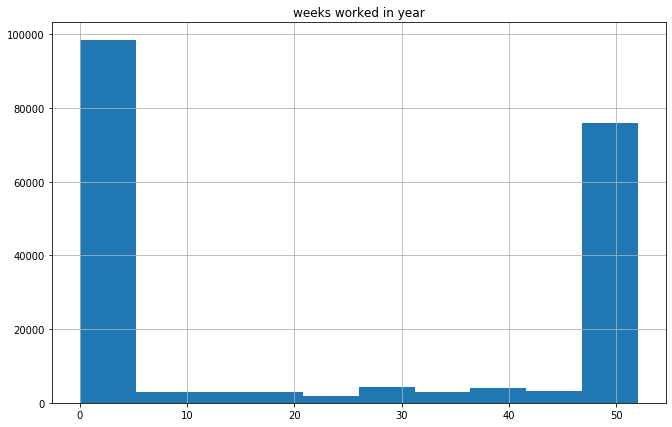

In [0]:
# weeks = processed_train_data[['weeks worked in year']].copy()
# weeks.hist()
# kb = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
# kb.fit(weeks)
# weeks = kb.transform(weeks)

# processed_train_data['weeks worked in year'] = weeks.astype('int64')

# weeks = processed_test_data[['weeks worked in year']].copy()

# weeks = kb.transform(weeks)

# processed_test_data['weeks worked in year'] = weeks.astype('int64')

In [0]:
# processed_train_data['dividends from stocks'] = processed_train_data['dividends from stocks'].astype('int64')
# processed_test_data['dividends from stocks'] = processed_test_data['dividends from stocks'].astype('int64')
# processed_train_data['income class'] = processed_train_data['income class'].astype('int64')



## Transform income class from bool to int

In [0]:
processed_train_data['income class'] = processed_train_data['income class'].astype('int64')

# Test different classifiers

## Decision Tree

In [0]:
# from sklearn.tree import DecisionTreeClassifier, plot_tree

# tree = DecisionTreeClassifier(random_state=10)

# tree.fit(X_train, y_train)

# tree.score(X_test, y_test)

0.9293482800674941

## Random Forest

In [0]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV

# # distributions = dict(n_estimators=np.linspace(100,1000, num=50, dtype='int64'))

# # classifier = RandomForestClassifier(n_jobs=-1)
# # clf = RandomizedSearchCV(classifier, distributions, random_state=10)
# clf = RandomForestClassifier(n_estimators=871, n_jobs=-1)
# clf.fit(X_train, y_train)
# # print(search.best_params_)
# # print(search.best_score_)
# clf.score(X_test, y_test)

# # clf.fit(X, y)
# # predictions = clf.predict(processed_test_data)


0.9554772207093573

## Gradient Boosting

In [0]:
# from sklearn.ensemble import GradientBoostingClassifier

# clf = GradientBoostingClassifier()
# clf.fit(X, y)
# # clf.fit(X_train, y_train)
# # clf.score(X_test, y_test)


# predictions = clf.predict(processed_test_data)


0.9545583641011076

In [0]:
from sklearn.model_selection import train_test_split
ready_data = processed_train_data.copy()
# print(ready_data.columns)
# lab = ['family members under 18', 'enroll in edu inst last wk']

# ready_data.drop(inplace=True, axis=1, labels=lab)

X = ready_data.drop(labels='income class', axis=1)
y = ready_data['income class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

## Histogram Gradient Boosting

In [35]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
clf = HistGradientBoostingClassifier()
score = cross_val_score(clf, X, y, cv=10)
print(f'Max score: {np.max(score)} Mean: {np.mean(score)} Min: {np.min(score)}')
# clf.fit(X, y)
# clf.fit(X_train, y_train)
# clf.score(X_test, y_test)


# predictions = clf.predict(processed_test_data)

Max score: 0.9588031874906029 Mean: 0.957007451623183 Min: 0.954691259021652


In [40]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

clf = HistGradientBoostingClassifier()

# clf.fit(X, y)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


# predictions = clf.predict(processed_test_data)

0.9545900930981656

# Train final model

Make data more even

In [0]:
data = ready_data.copy()

data = data.sort_values(by='income class')
data = data[150000:]
print(data['income class'].value_counts())

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

X = data.drop(labels='income class', axis=1)
y = data['income class']


scores = [0]
for _ in range(40):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
  clf = HistGradientBoostingClassifier()

  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  if score > np.max(scores):
    predictions = clf.predict(processed_test_data)
  scores.append(score)

print(scores)
print(np.max(scores))

0    37141
1    12382
Name: income class, dtype: int64
[0, 0.9024833434282253, 0.8946093276801939, 0.8919846557641833, 0.8948112255198869, 0.8958207147183526, 0.8935998384817282, 0.8958207147183526, 0.8901675752069453, 0.8968302039168181, 0.8911770644054109, 0.8903694730466384, 0.8911770644054109, 0.9061175045427013, 0.8927922471229558, 0.8915808600847971, 0.8913789622451039, 0.8960226125580456, 0.8905713708863315, 0.8986472844740562, 0.8940036341611145, 0.8942055320008075, 0.8915808600847971, 0.8940036341611145, 0.9016757520694528, 0.8994548758328286, 0.9016757520694528, 0.8960226125580456, 0.8887542903290935, 0.8942055320008075, 0.8940036341611145, 0.9032909347869977, 0.8927922471229558, 0.89501312335958, 0.8986472844740562, 0.8986472844740562, 0.8935998384817282, 0.892994144962649, 0.8978396931152837, 0.8917827579244902, 0.8952150211992732]
0.9061175045427013


# Save the results

In [0]:
with open('submit.csv', 'w+') as file:
  file.write('index,income class\n')
  for i, row in enumerate(predictions):
    file.write(f'{i},{row}\n')